### Decision tree Regression 

Now we will solve the Regression problem using a decision tree. A decision tree is a non-parametric machine learning model in contrast to linear/logistic regression which is a parametric model.

First we solve the regression problem with the Decision Tree and then Classification problem.

#### Prepare data
First we will prepare some data for demonstrating linear regression. To keep things simple we will assume we have a single input feature. Let us use the following function to generate our data: $$y = \frac{x}{2}+sin(x)+\epsilon$$ Where $\epsilon \sim \mathcal{N}(0,1)$ is Gaussian noise.

In [2]:
import numpy as np
from sklearn import linear_model, datasets, tree
import matplotlib.pyplot as plt
%matplotlib inline

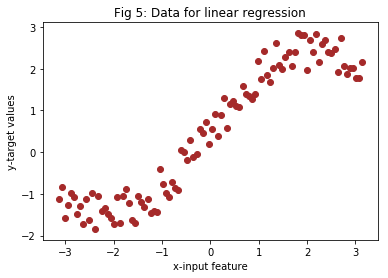

In [4]:
number_of_samples = 100
x = np.linspace(-np.pi, np.pi, number_of_samples)
y = 0.5*x+np.sin(x)+np.random.random(x.shape)
plt.scatter(x,y,color='brown') #Plot y-vs-x in dots
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 5: Data for linear regression')
plt.show()


#### Split the data into training, validation and test sets

In [6]:
random_indices = np.random.permutation(number_of_samples)
# Training set 
x_train = x[random_indices[:70]]
y_train = y[random_indices[:70]]
#Validation set
x_val = x[random_indices[70:85]]
y_val = y[random_indices[70:85]]
#Test set
x_test = x[random_indices[85:]]
y_test = y[random_indices[85:]]

#### Fit a line to the data
A decision tree learns a piece-wise linear fit to the data

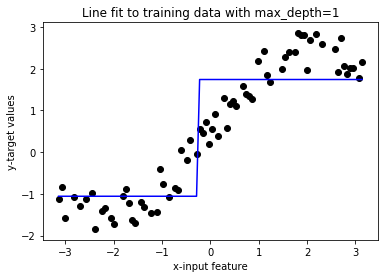

Training MSE:0.4601102353032783 
Validation MSE:0.33561412672564184 
Test MSE:0.2354742891678182


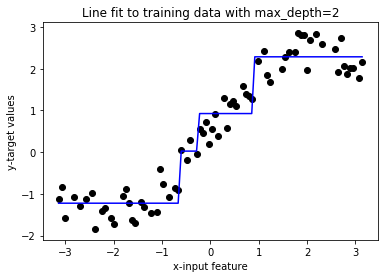

Training MSE:0.12948761117817975 
Validation MSE:0.09754027308082426 
Test MSE:0.11564633394070115


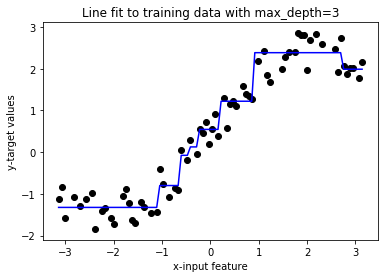

Training MSE:0.07735488175795598 
Validation MSE:0.08918259254482282 
Test MSE:0.11510551615709272


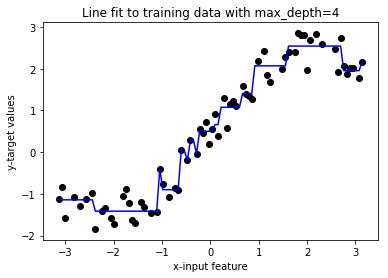

Training MSE:0.051311996678855415 
Validation MSE:0.09862011923089457 
Test MSE:0.09676701011148128


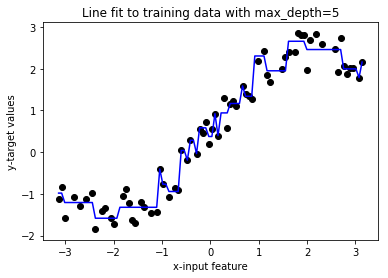

Training MSE:0.03798909778338131 
Validation MSE:0.1484802083075916 
Test MSE:0.11046243580187896


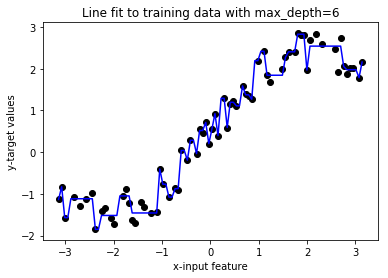

Training MSE:0.014219709146699793 
Validation MSE:0.2203319766151362 
Test MSE:0.12110252859409427


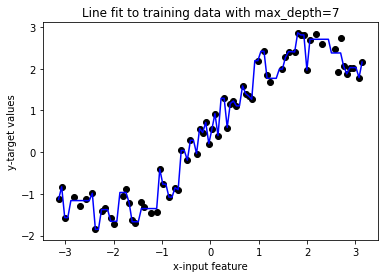

Training MSE:0.007146521256931533 
Validation MSE:0.2487011467997813 
Test MSE:0.13902904345450703


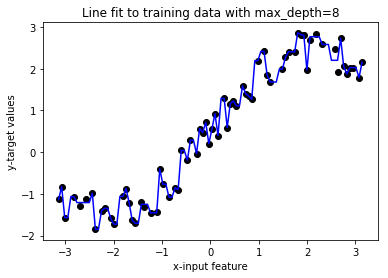

Training MSE:0.0026954964051258516 
Validation MSE:0.26014390582108143 
Test MSE:0.13689326045219494


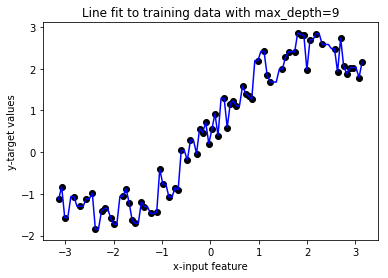

Training MSE:1.6096360932241848e-09 
Validation MSE:0.2718388877665078 
Test MSE:0.12555989374520962


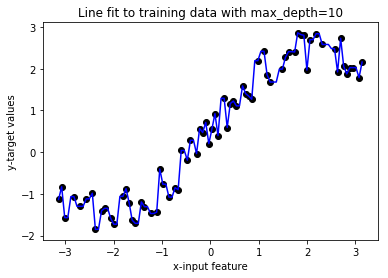

Training MSE:1.6096360932241848e-09 
Validation MSE:0.2718388877665078 
Test MSE:0.12555989374520962


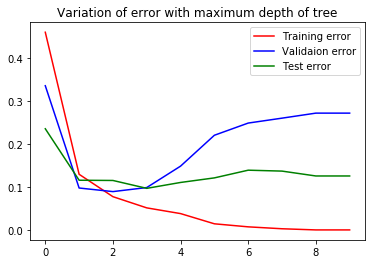

In [19]:
maximum_depth_of_tree = np.arange(10)+1
train_err_arr = []
val_err_arr = []
test_err_arr = []

for depth in maximum_depth_of_tree:
    model = tree.DecisionTreeRegressor(max_depth=depth)
    #Converts the input arrays into matrices by using the reshpae as sklearn take input in column matrices
    x_train_for_line_fitting = np.matrix(x_train.reshape(len(x_train),1))
    y_train_for_line_fitting = np.matrix(y_train.reshape(len(y_train),1))
    
    # fit the line to the training data
    model.fit(x_train_for_line_fitting, y_train_for_line_fitting)
    model_predict_all = model.predict(x.reshape(len(x),1))
    model_predict_train = model.predict(x_train.reshape(len(x_train),1))
    model_predict_val = model.predict(x_val.reshape(len(x_val),1))
    model_predict_test = model.predict(x_test.reshape(len(x_test),1))
    
#     plot the line
    plt.figure()
    plt.scatter(x_train,y_train,color='black')
    plt.plot(x.reshape(len(x),1),model_predict_all,color='blue')
#     plt.plot(x.reshape(len(x),1),model_predict_train,color='blue')
#     plt.plot(x.reshape(len(x),1),model_predict_val,color='red')
#     plt.plot(x.reshape(len(x),1),model_predict_test,color='green')
    plt.xlabel('x-input feature')
    plt.ylabel('y-target values')
    plt.title('Line fit to training data with max_depth='+str(depth))
    plt.show()
    
    mean_sq_train_error = np.mean((y_train - model_predict_train)**2)
    mean_sq_val_error = np.mean((y_val - model_predict_val)**2)
    mean_sq_test_error = np.mean((y_test - model_predict_test)**2)
    
    train_err_arr.append(mean_sq_train_error)
    val_err_arr.append(mean_sq_val_error)
    test_err_arr.append(mean_sq_test_error)
    
    print('Training MSE:{} \nValidation MSE:{} \nTest MSE:{}'.format(mean_sq_train_error,mean_sq_val_error,mean_sq_test_error))
plt.figure()
plt.plot(train_err_arr,c='red')
plt.plot(val_err_arr,c='blue')
plt.plot(test_err_arr,c='green')
plt.legend(['Training error','Validaion error','Test error'])
plt.title('Variation of error with maximum depth of tree')
plt.show()

We can see from the plot above how the generalization performance of the model can be controlled via the depth of the decision gree. The training error decreases steadily with incresing depth as the model fits the data more and more closely. The generalization errors given by the validation and test errors also decrease till a depth of 3 as the bias of the model reduces.
##### However, as we increase the depth beyond 3, the model starts overfitting the data(huggs onto noise in the data) and validation and test errors increase. Thus the ability of the model to generalize deteriorates as overfitting sets in.